In [4]:
# Brookes Heil Blackburn
# MAT 5990 Spring 2026
# Homework #1

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})

[[ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]]
[[1.   2.  ]
 [1.   1.  ]
 [1.   0.5 ]
 [1.   0.25]]
[ 1.9 -0.3]
[1.39130435 0.3826087 ]


C:\Users\User\AppData\Local\Temp\ipykernel_38640\1509320126.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


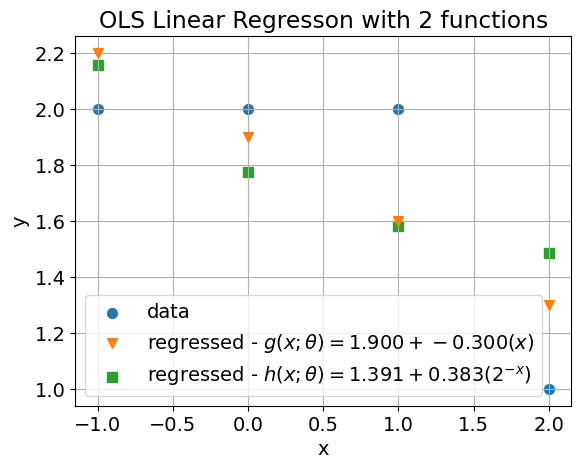

In [26]:
# given individual data x, define the 
# functions in a row of Phi.
# Most function formulas should work "as you expect"
# (assuming x is a numpy array).

# note to self: In linear regression c_0 + c_1 (x) results in Phi:
# Phi col n=1 of all 1s for phi_0 
# Phi col n=2 is output of X vector plugged into the function phi_1

gfuncs = lambda x : np.array([
        np.ones(np.shape(x)), 
        x
        ])

hfuncs = lambda x : np.array([
        np.ones(np.shape(x)), 
        2.0**-x
        ])

# The Data
X = np.array([-1, 0, 1, 2])
y = np.array([2, 2, 2, 1])


K = 2 # you could do this fancier -- not important ----What is this???
#

# list comprehension approach to create Phi
# X is the list of values we cycle through, easier to understand this code
Phi_g = np.array([gfuncs(xi) for xi in X])
Phi_h = np.array([hfuncs(xi) for xi in X])
print(Phi_g)
print(Phi_h)

# Let Python solve for theta in the \Phi^T\Phi\theta = \Phi^T * y "Normals Equations"
# Theta represents the c_0 and c_1 which are the coefficients on the linear regression

theta_g = np.linalg.lstsq(Phi_g, y)[0]
print(theta_g)
theta_h = np.linalg.lstsq(Phi_h, y)[0]
print(theta_h)

# gvals represent the function output of the g(X, \theta)...the intercept(c_0) and slope(c_1) of linear regression
# hvals represtnt the function output of the h(x, \theta)...not linear in shape because raised to ^-x??)
# with least residuals

gvals = Phi_g @ theta_g # matrix-vector product
hvals = Phi_h @ theta_h # matrix-vector product

####
# Visualize

fig,ax = plt.subplots()

# original data
ax.scatter(X,y, marker='o', s=50, label='data')

# regression
ax.scatter(X, gvals, marker='v', s=50, label=rf'regressed - $g(x; \theta) = {theta_g[0]: .3f} + {theta_g[1]: .3f}(x)$', zorder=2)
# Test if this works with "gvals" instead of doing the Phi@theta?? - it does!
ax.scatter(X, hvals, marker='s', s=50, label=rf'regressed - $h(x; \theta) = {theta_h[0]: .3f} + {theta_h[1]: .3f}(2^{{-x}})$', zorder=1)

# polish
# ax.title('OLS Linear Regresson with 2 functions')
ax.legend()
ax.set(title='OLS Linear Regresson with 2 functions',xlabel='x', ylabel='y')
ax.grid()
plt.savefig(f'MAT5990_HW1_2c.jpg')
fig.show()
